In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler


In [3]:
data=pd.read_csv('C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\multi linear regression\\ToyotaCorolla.csv',delimiter=',',encoding= 'unicode_escape',usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# EDA

In [4]:
data.shape

(1436, 9)

In [5]:
data.info

<bound method DataFrame.info of       Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]>

In [6]:
data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
data.drop_duplicates()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
data.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [9]:
data['Age_08_04']=data.rename({'Age_08_04':'Age','Quarterly_Tax':'QT','Weight':'WT'},inplace=True,axis=1)
data.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT,Age_08_04
0,13500,23,46986,90,2000,3,5,210,1165,None
1,13750,23,72937,90,2000,3,5,210,1165,None
2,13950,24,41711,90,2000,3,5,210,1165,None
3,14950,26,48000,90,2000,3,5,210,1165,None
4,13750,30,38500,90,2000,3,5,210,1170,None


In [10]:
data1=data.iloc[:,:9]
data1.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


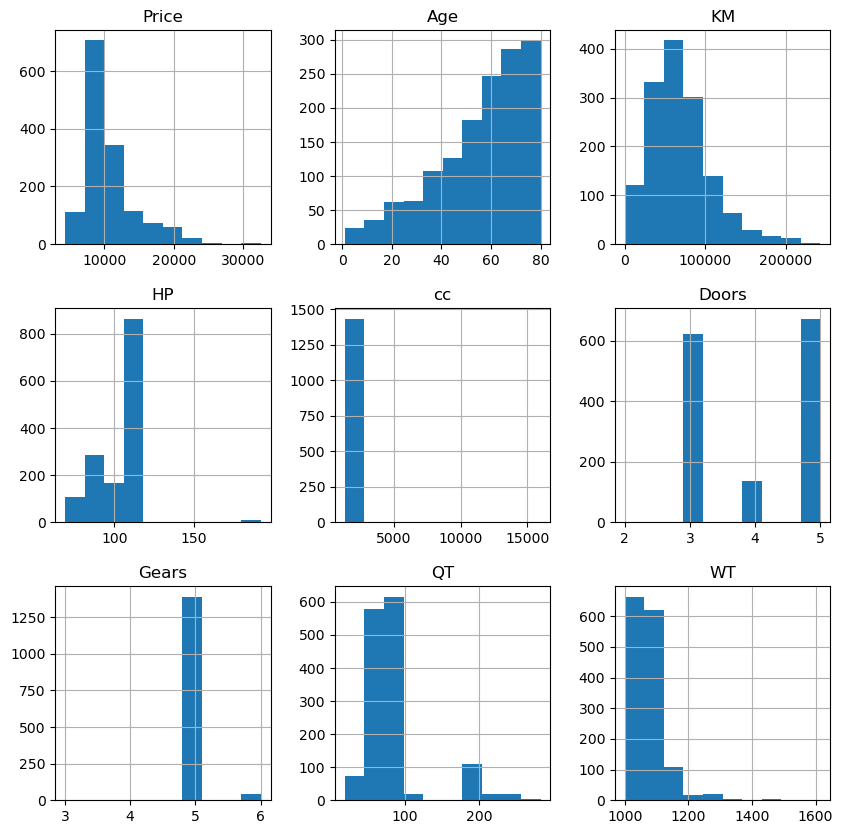

In [11]:
data1.hist(figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'Gears')

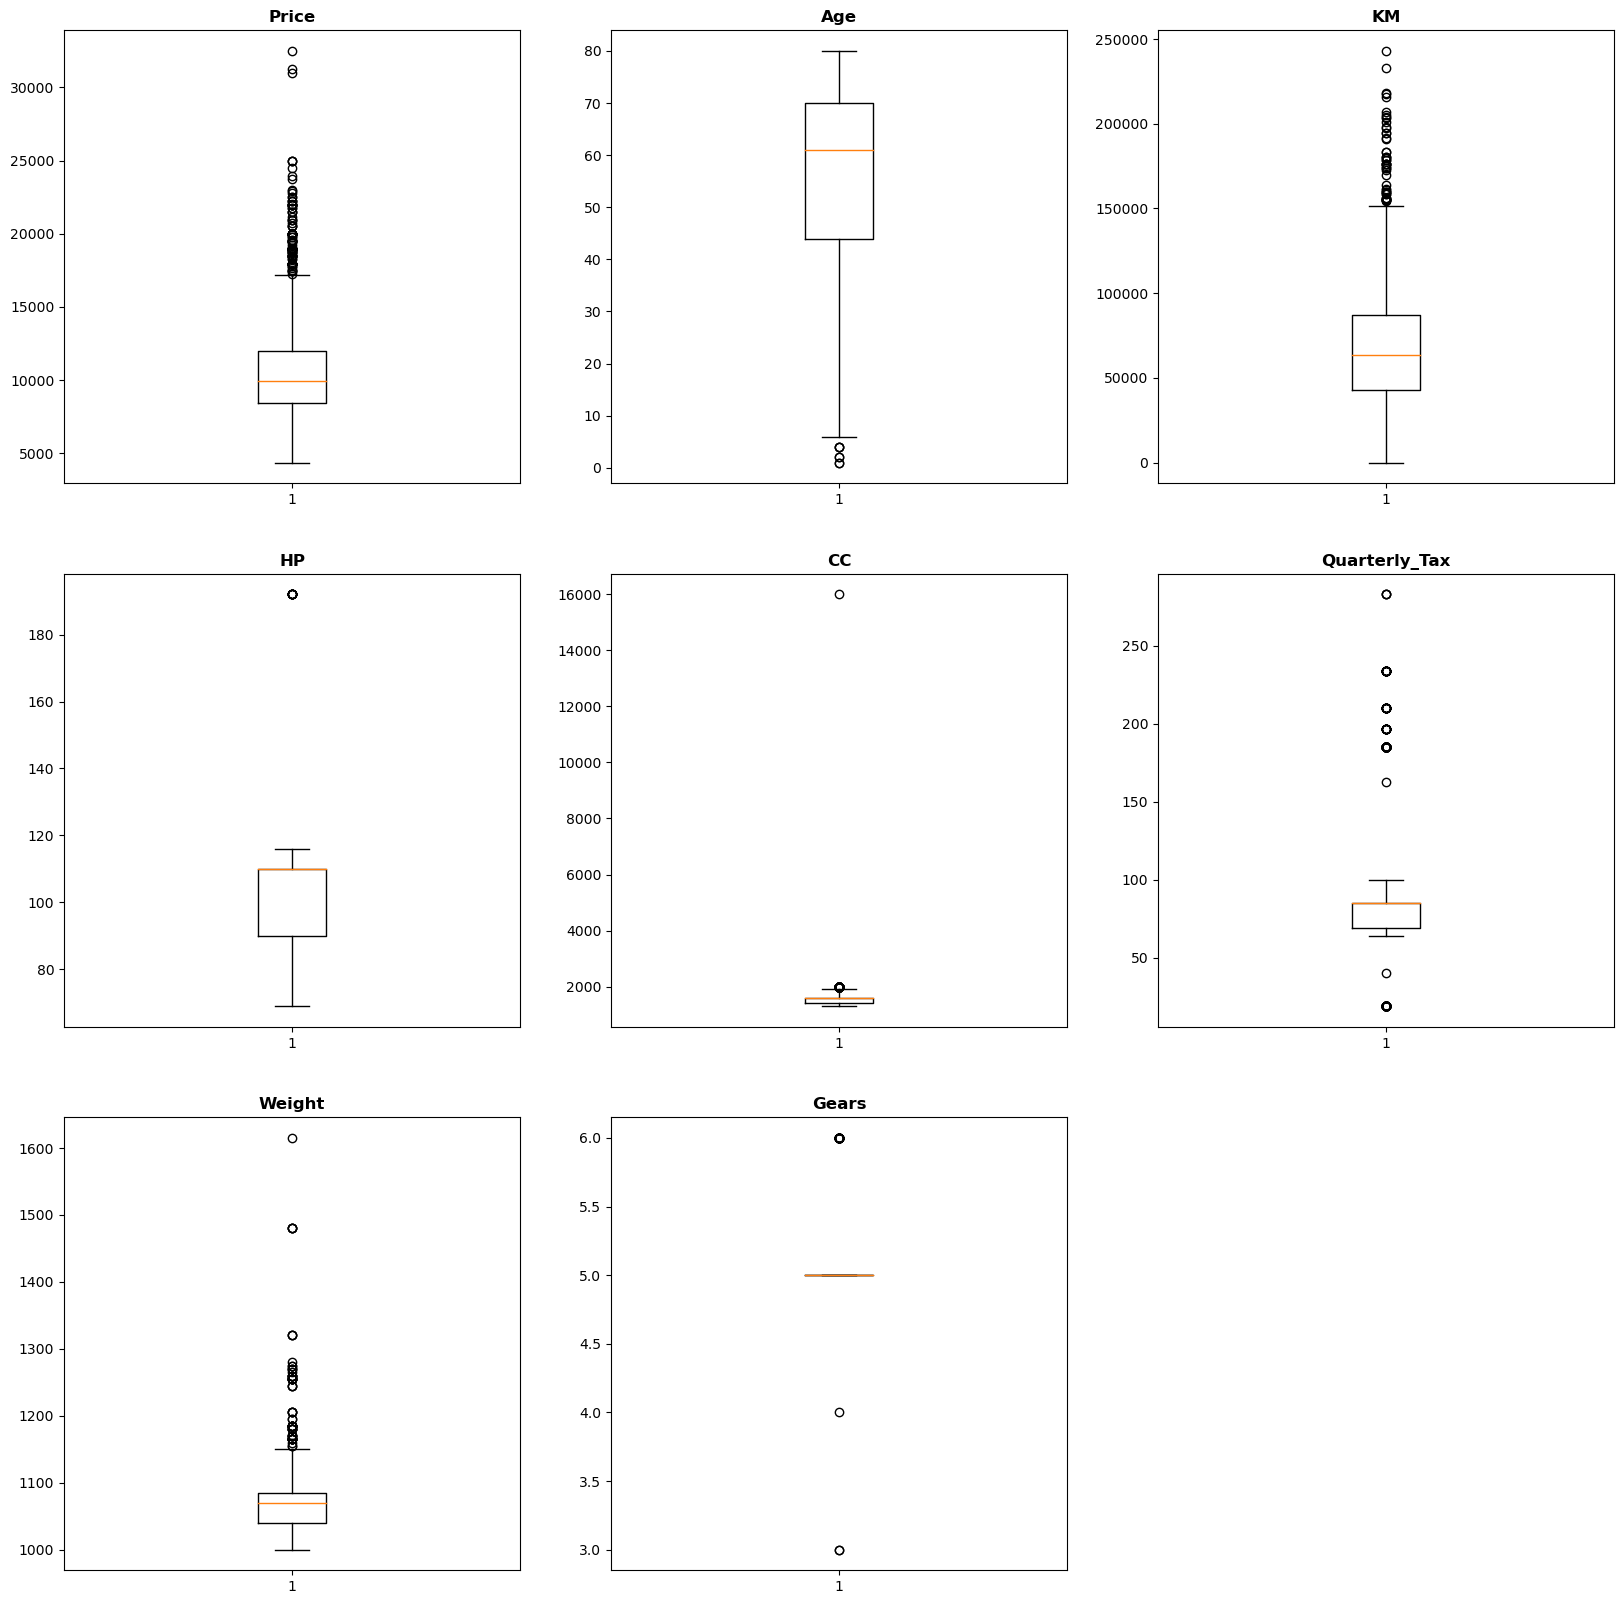

In [12]:
plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
plt.boxplot('Price', data = data1)
plt.title('Price', fontweight = 'bold')

plt.subplot(3,3,2)
plt.boxplot('Age', data = data1)
plt.title('Age', fontweight = 'bold')

plt.subplot(3,3,3)
plt.boxplot('KM', data = data1)
plt.title('KM', fontweight = 'bold')

plt.subplot(3,3,4)
plt.boxplot('HP', data = data1)
plt.title('HP', fontweight = 'bold')

plt.subplot(3,3,5)
plt.boxplot('cc', data = data1)
plt.title('CC', fontweight = 'bold')

plt.subplot(3,3,6)
plt.boxplot('QT', data = data1)
plt.title('Quarterly_Tax', fontweight = 'bold')

plt.subplot(3,3,7)
plt.boxplot('WT', data = data1)
plt.title('Weight', fontweight = 'bold')

plt.subplot(3,3,8)
plt.boxplot('Gears', data = data1)
plt.title('Gears', fontweight = 'bold')

In [13]:
# outliers exist in each feature
#each feature doesnot follow gaussian distribution

In [14]:
data1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# correlation analysis

In [15]:
data1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


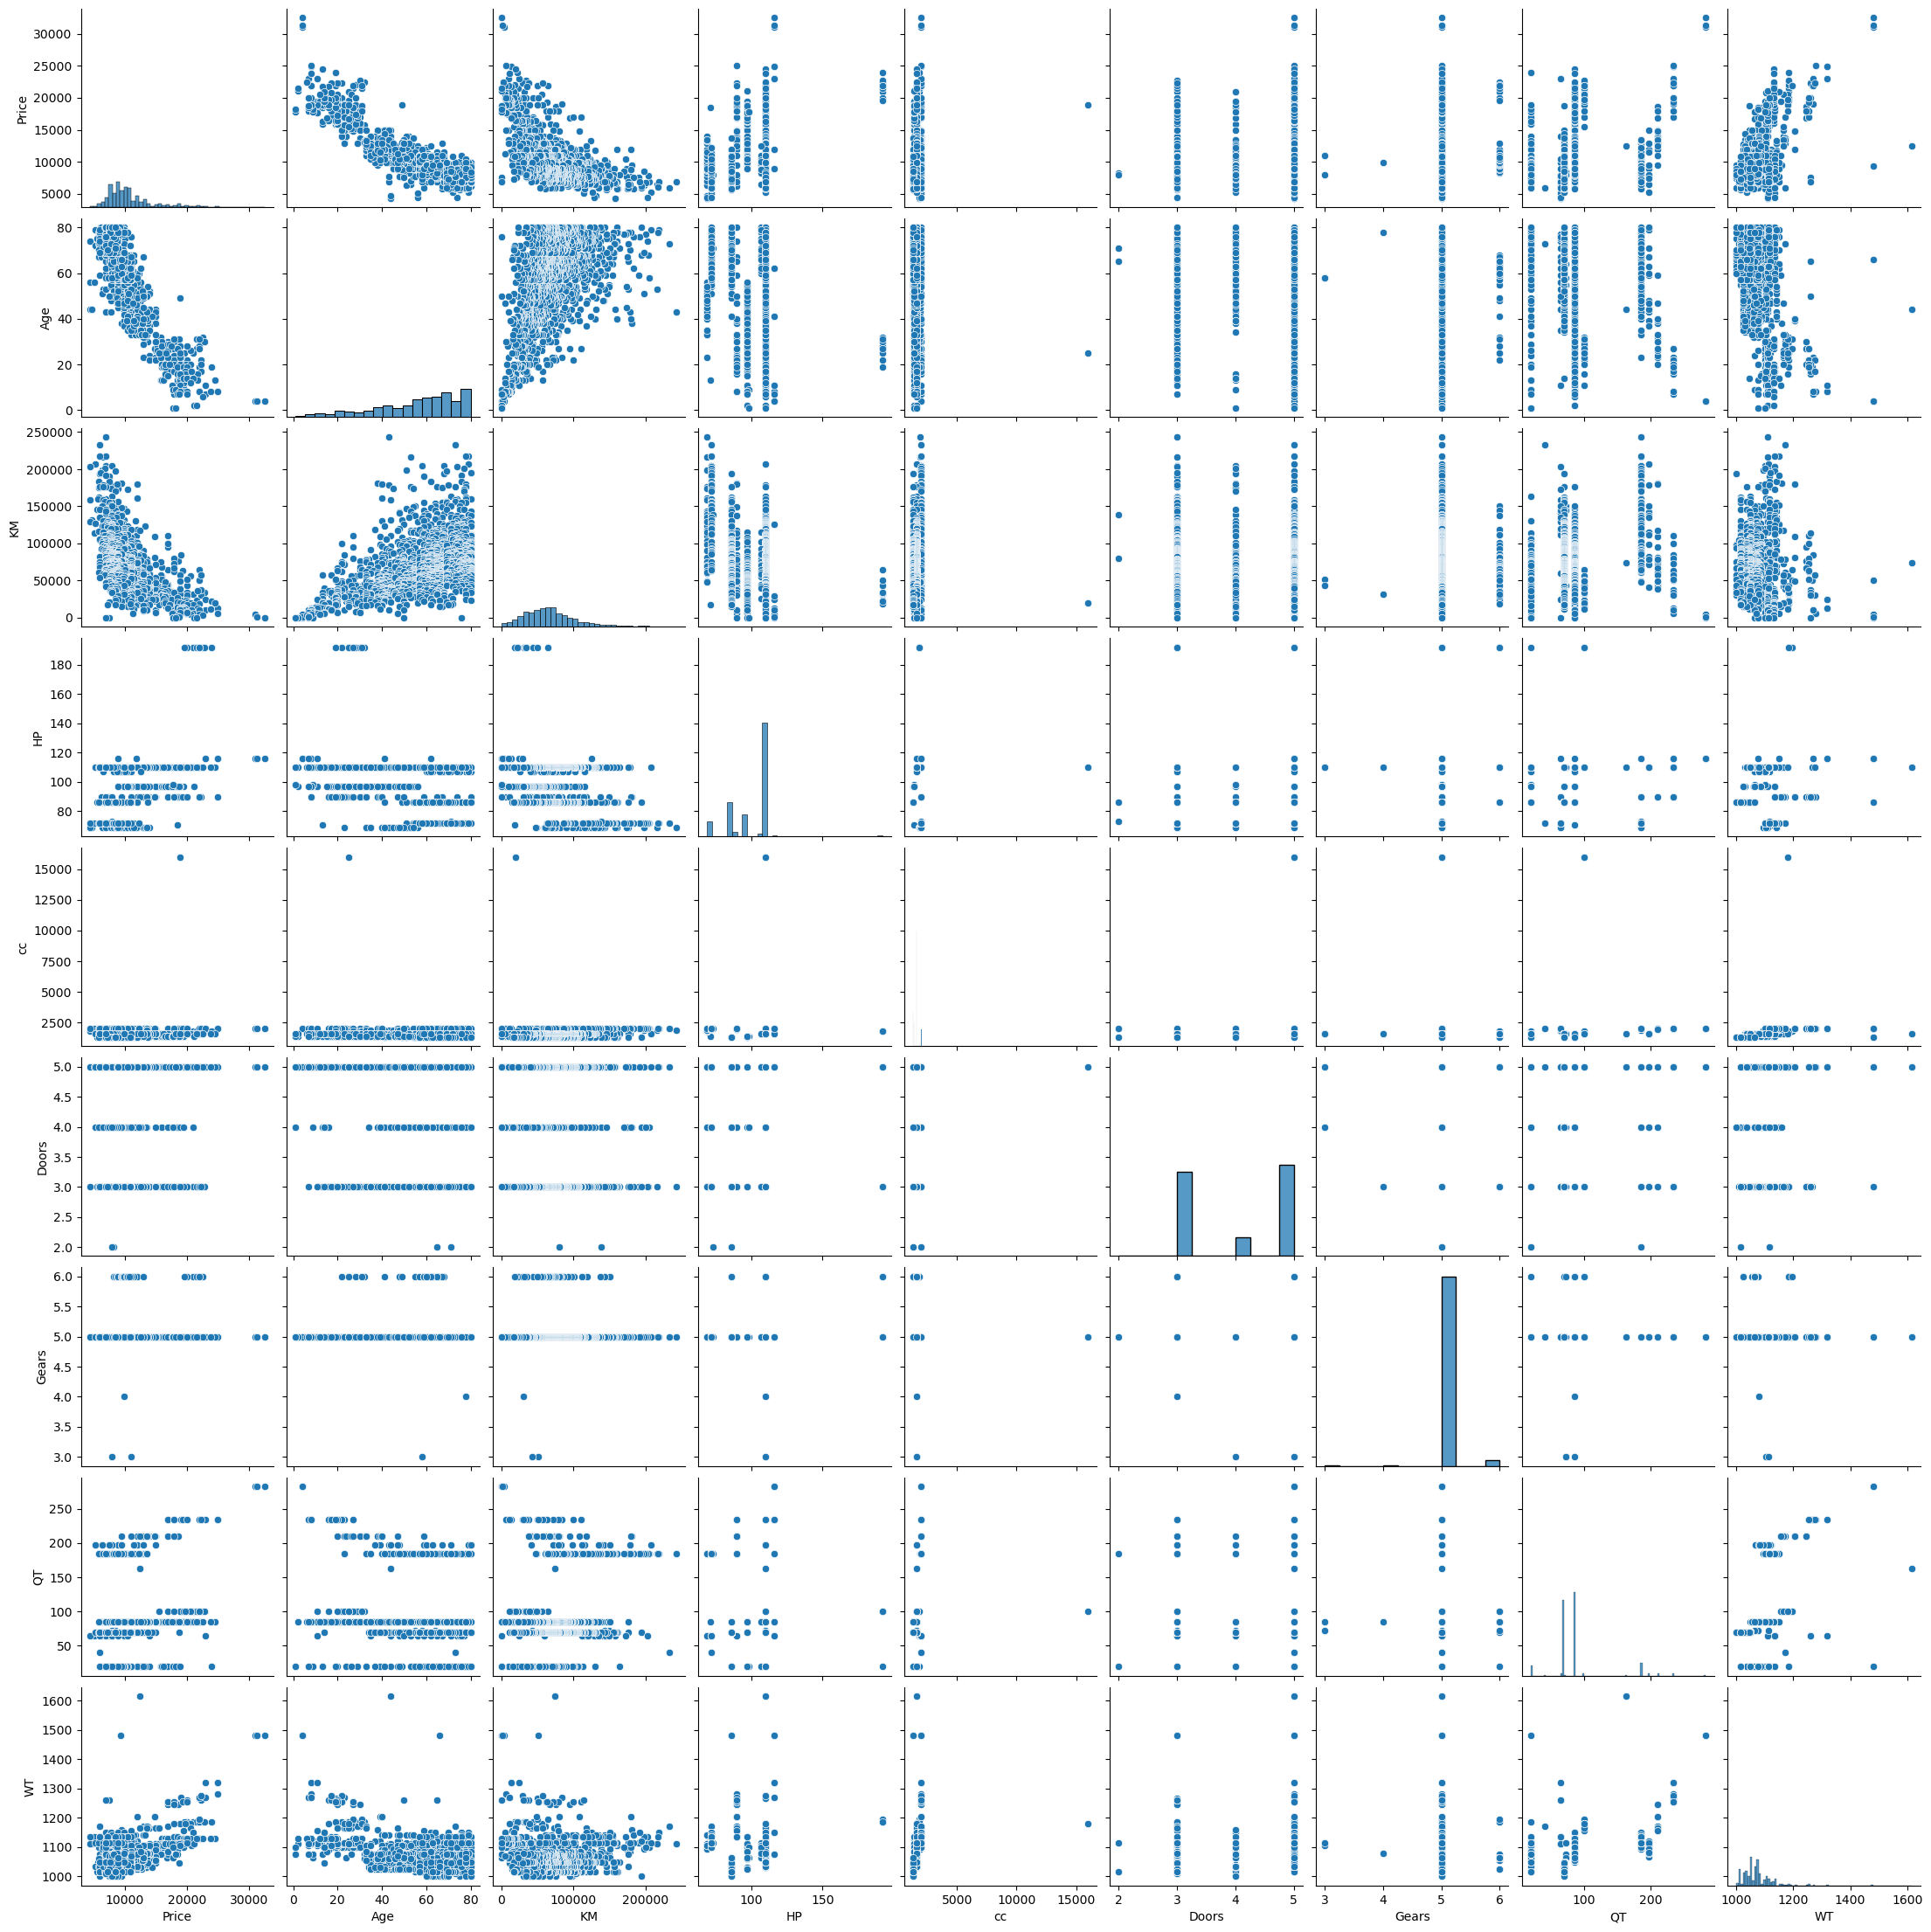

In [16]:
sns.pairplot(data1)

In [17]:
X_df=data1.drop(columns=["Price"])

In [18]:
X_df

,Age,KM,HP,cc,Doors,Gears,QT,WT
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [19]:
y_df=data1.iloc[:,:1]

In [20]:
y_df

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


# Standardization

In [21]:
scaler=StandardScaler()
data_sd=scaler.fit_transform(X_df.values)
#data_df1=pd.DataFrame(data_sd,columns=['Age','KM','HP','CC','Doors','Gears','Qt','WT'])
#data_df.head()
data_df=pd.DataFrame(data_sd,columns=['Age','KM','HP','CC','Doors','Gears','Qt','WT'])
data_df['Price']=y_df

In [22]:
data_df

,Age,KM,HP,CC,Doors,Gears,Qt,WT,Price
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561,13500
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561,13750
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561,13950
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561,14950
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577,13750
...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883,7500
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915,10845
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915,8500
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915,7250


In [23]:
#x_df=data_df.drop(columns=['Price'])

In [24]:
#x_df.head()

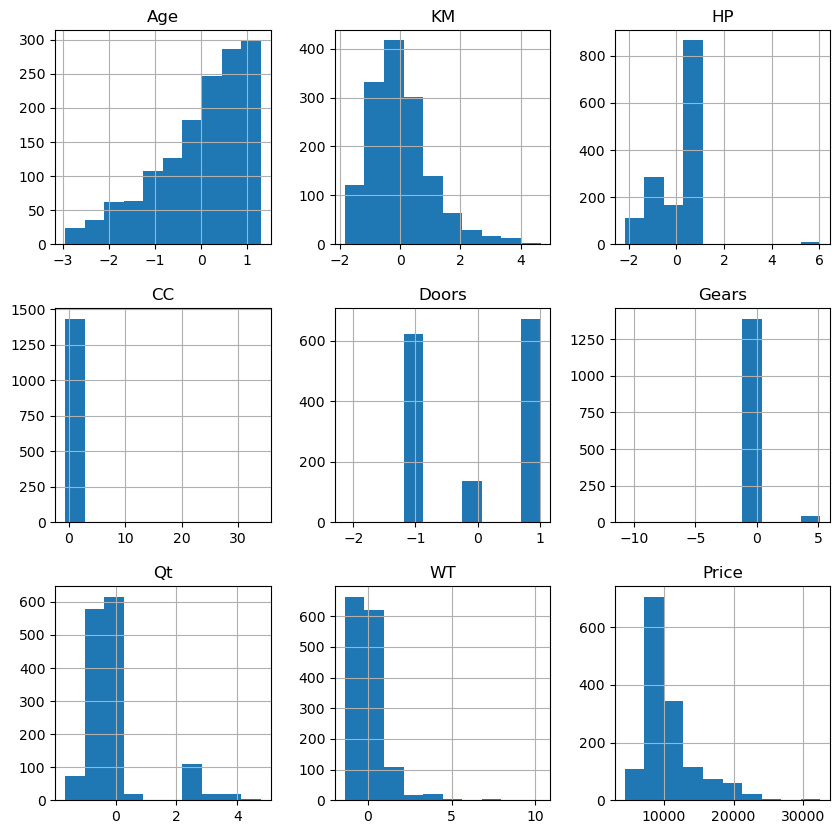

In [25]:
data_df.hist(figsize=(10,10))
plt.show()

# model buliding

In [26]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qt+WT',data=data_df).fit()

In [27]:
model.params

Intercept    10730.824513
Age          -2262.056818
KM            -780.504686
HP             474.448890
CC             -51.375468
Doors           -1.539600
Gears          111.996499
Qt             162.363645
WT             892.410492
dtype: float64

In [28]:
print(model.tvalues,'\n',model.pvalues)

Intercept    302.904059
Age          -46.511852
KM           -16.621622
HP            11.241018
CC            -1.344222
Doors         -0.040410
Gears          3.016007
Qt             3.014535
WT            15.879803
dtype: float64 
 Intercept     0.000000e+00
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
CC            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Qt            2.619148e-03
WT            2.048576e-52
dtype: float64


In [29]:
# doors and gears have insignificant values p>0.05

In [30]:
print(model.rsquared,model.aic)

0.8637627463428192 24769.07664007625


In [31]:
# simple linear regression

In [32]:
m_g=smf.ols('Price~CC',data=data_df).fit()

In [33]:
m_g.pvalues

Intercept    0.000000
CC           0.000002
dtype: float64

In [34]:
m_d=smf.ols('Price~Doors',data=data_df).fit()

In [35]:
m_d.pvalues

Intercept    0.000000e+00
Doors        1.461237e-12
dtype: float64

In [36]:
#new model buliding without the cc and gears

In [37]:
model2=smf.ols('Price~Age+KM+HP+Doors++Qt+WT',data=data_df).fit()

In [38]:
print(model2.rsquared,model2.aic)

0.862710054870824 24776.12981814364


In [39]:
# Here, even after removing 'cc' & 'Doors' features, still there is not observable improvement in the model.

In [40]:
# vif

In [41]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(data_df.values, i) for i in range(data_df.shape[1])]
vif['variable'] = data_df.columns

In [45]:
vif

,VIF,variable
0,1.928376,Age
1,1.762114,KM
2,1.421347,HP
3,1.163917,CC
4,1.156575,Doors
5,1.098830,Gears
6,2.311656,Qt
7,2.523230,WT
8,1.097098,Price


# all the variables has VIF<10, means there is no collinearity

In [46]:
model_pred=pd.DataFrame(data_df['Price'])
model_pred['Preidicted']=model.fittedvalues
model_pred['Error']=model.resid
model_pred['Error_sqrd']=(model.resid)**2

In [47]:
model_pred.head()

,Price,Preidicted,Error,Error_sqrd
0,13500,16812.580505,-3312.580505,1.097319e+07
1,13750,16272.355186,-2522.355186,6.362276e+06
2,13950,16800.732460,-2850.732460,8.126676e+06
3,14950,16426.496731,-1476.496731,2.180043e+06
4,13750,16222.419010,-2472.419010,6.112856e+06


# by subset selection,model with all featuues has low aic and high rsquare value

# residual analysis

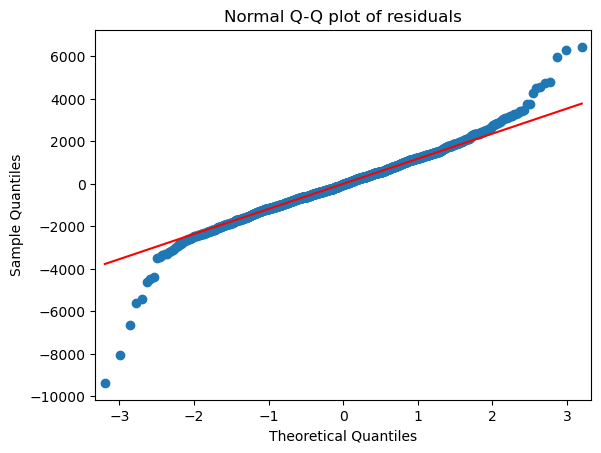

In [48]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
qqplot=plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [49]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

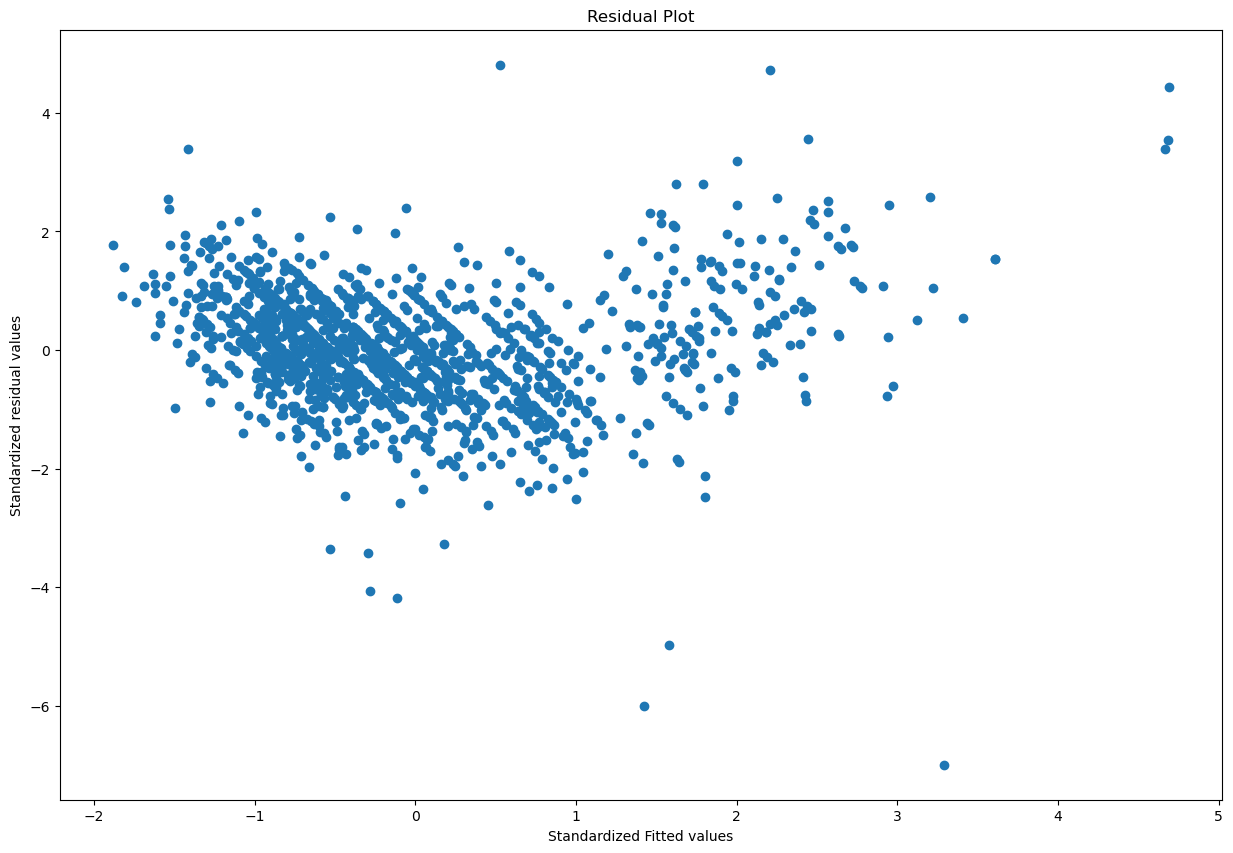

In [50]:
plt.figure(figsize=(15,10))
scatterplot=plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
# no pattern of residuals 

# residual vs regressors

eval_env: 1


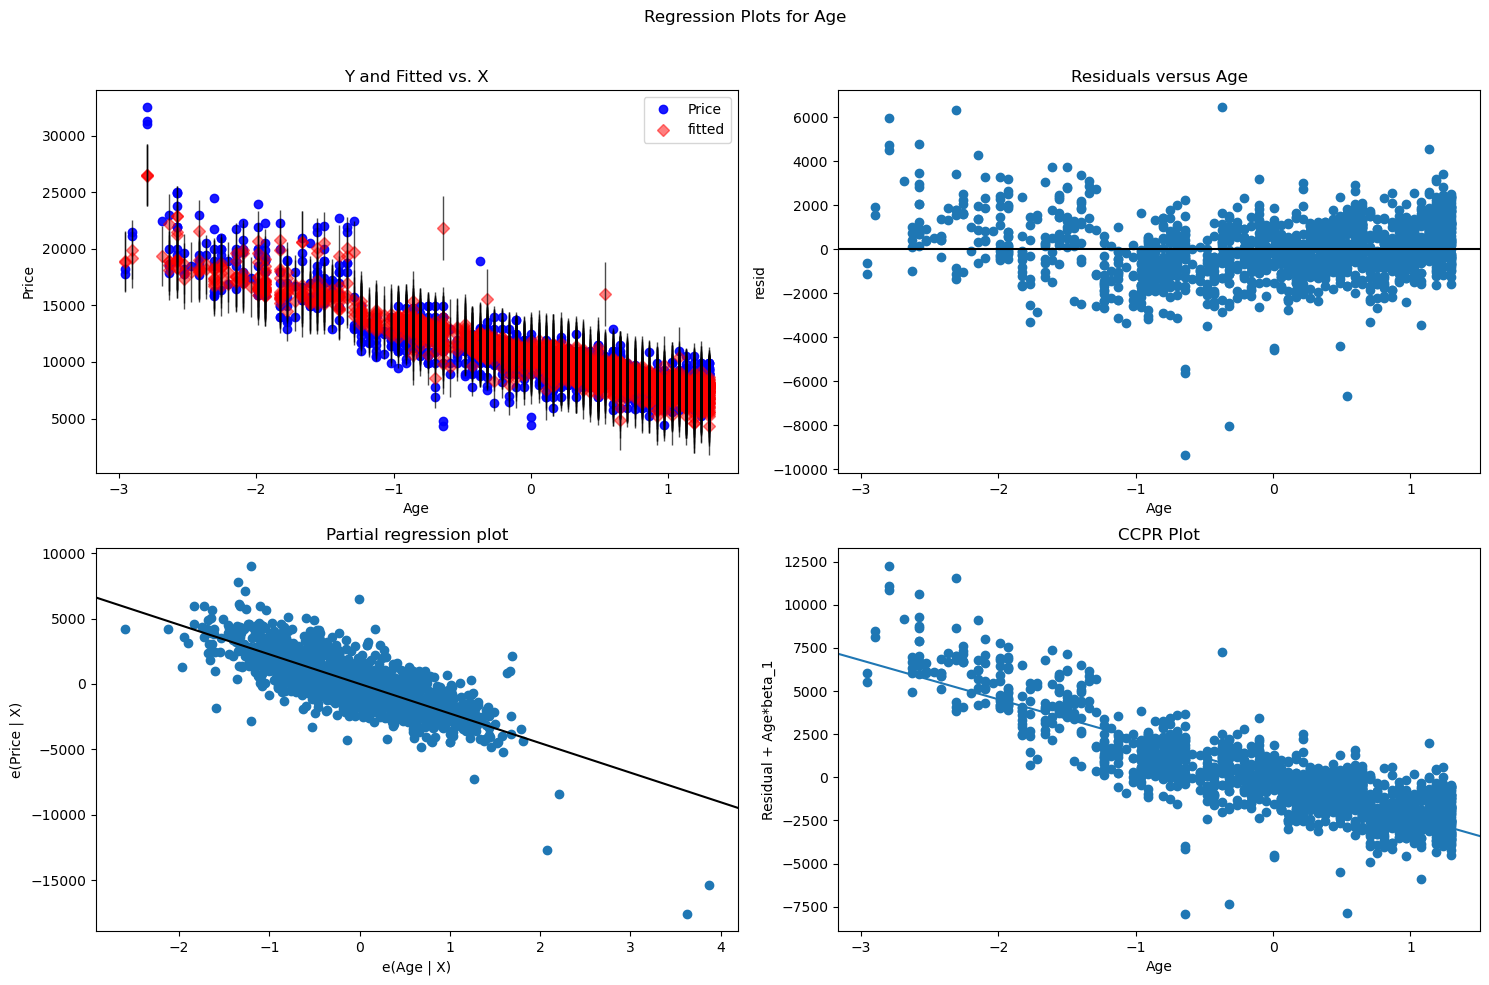

In [51]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


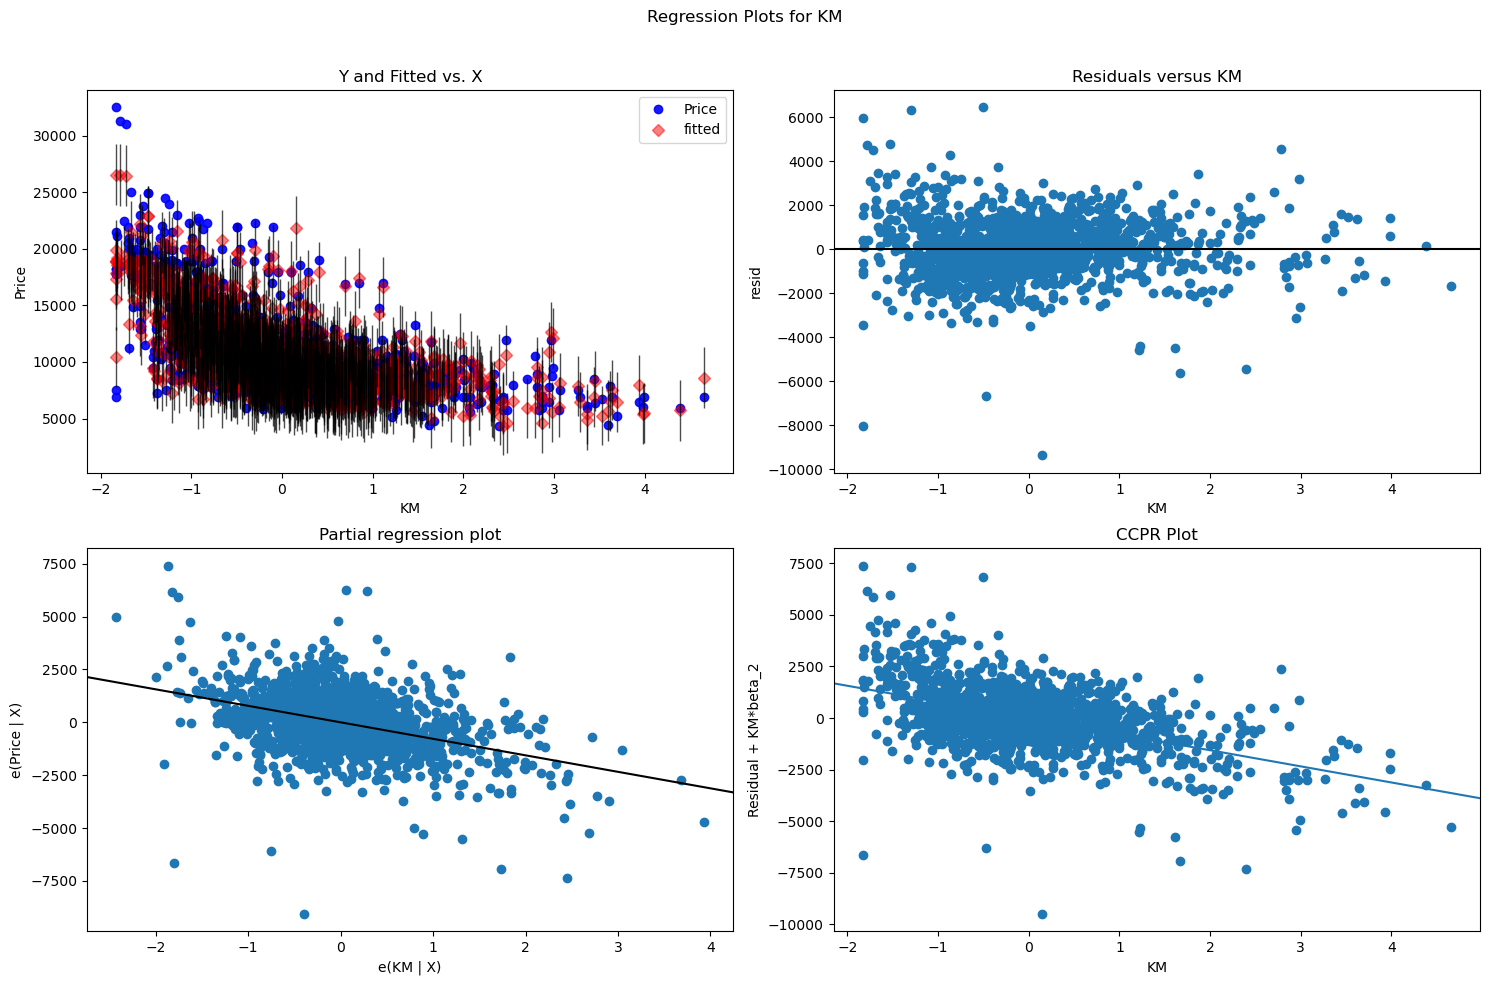

In [52]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


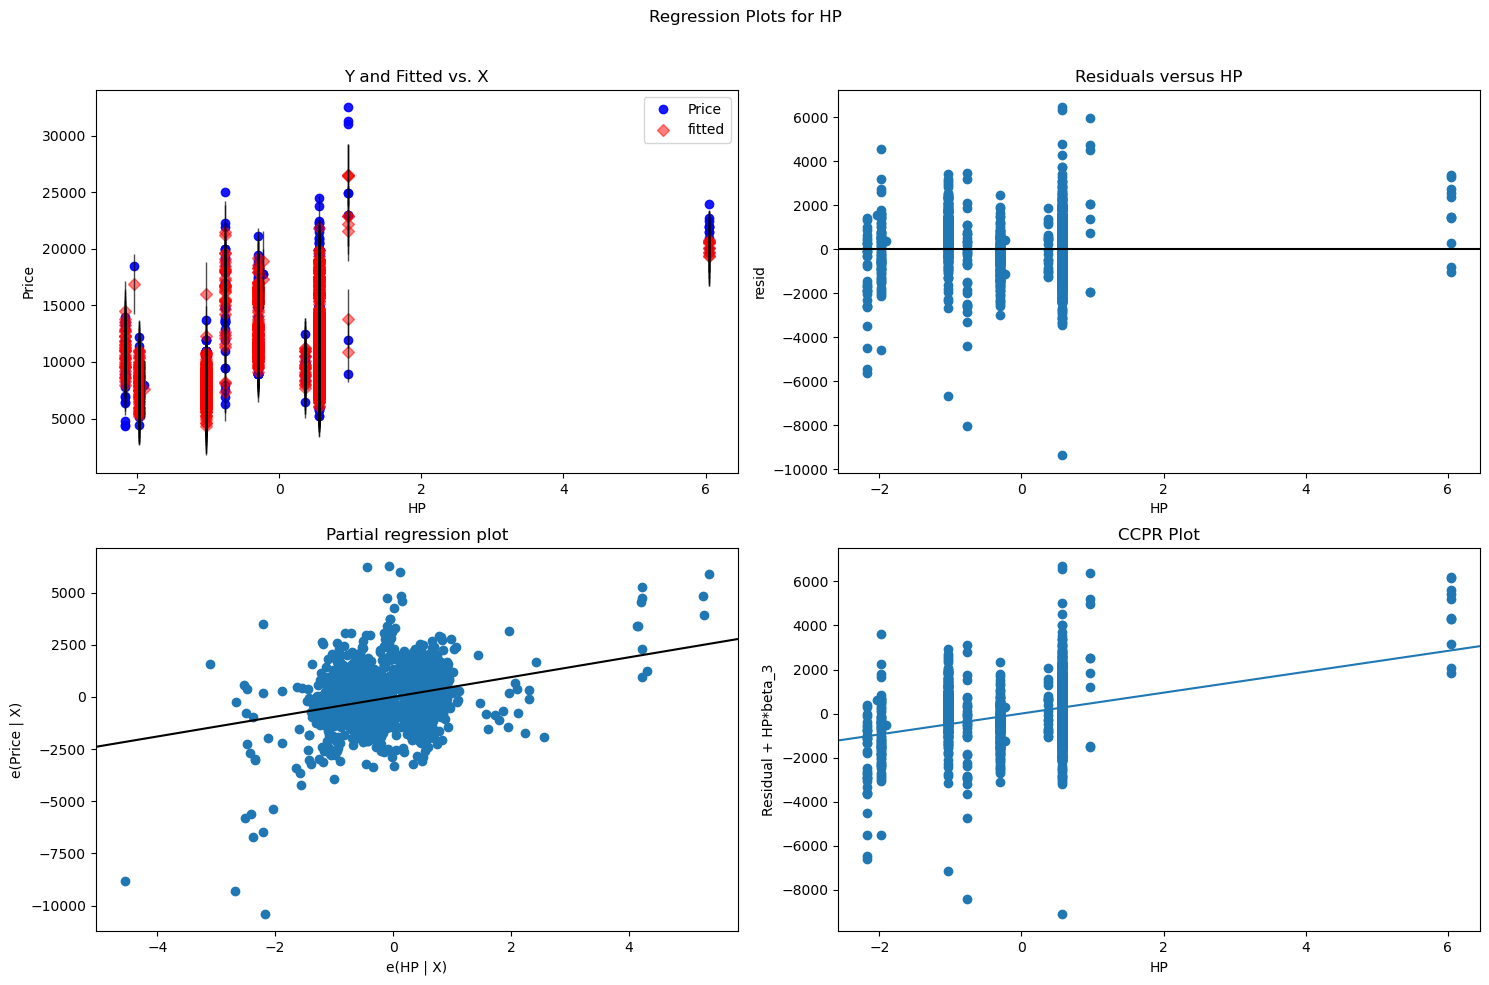

In [53]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


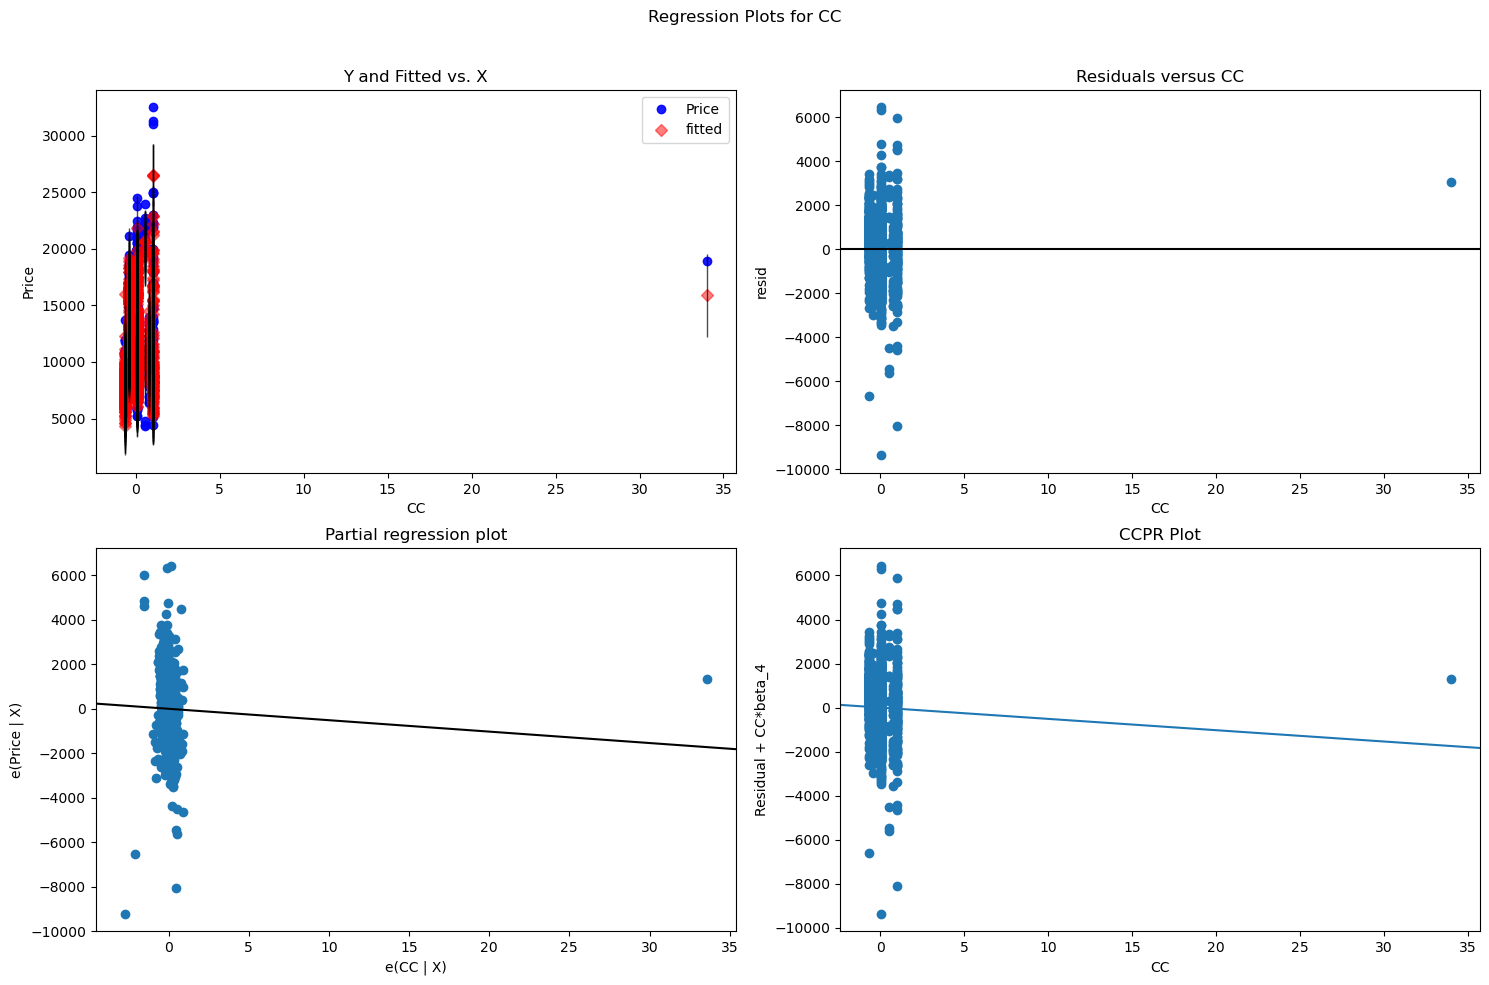

In [54]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

eval_env: 1


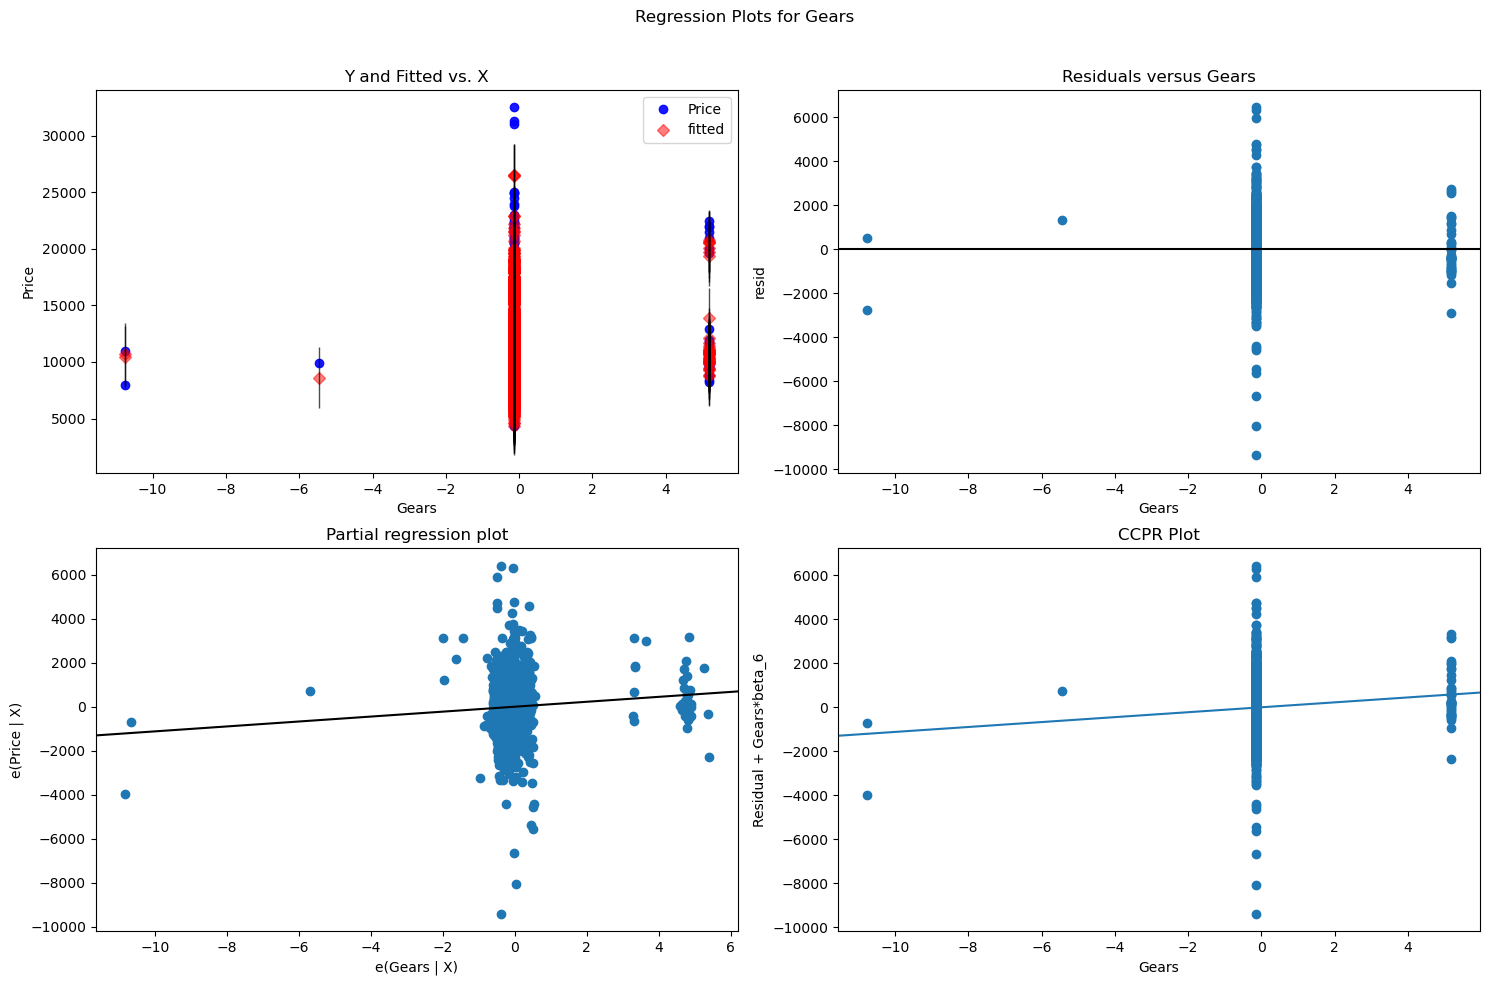

In [55]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


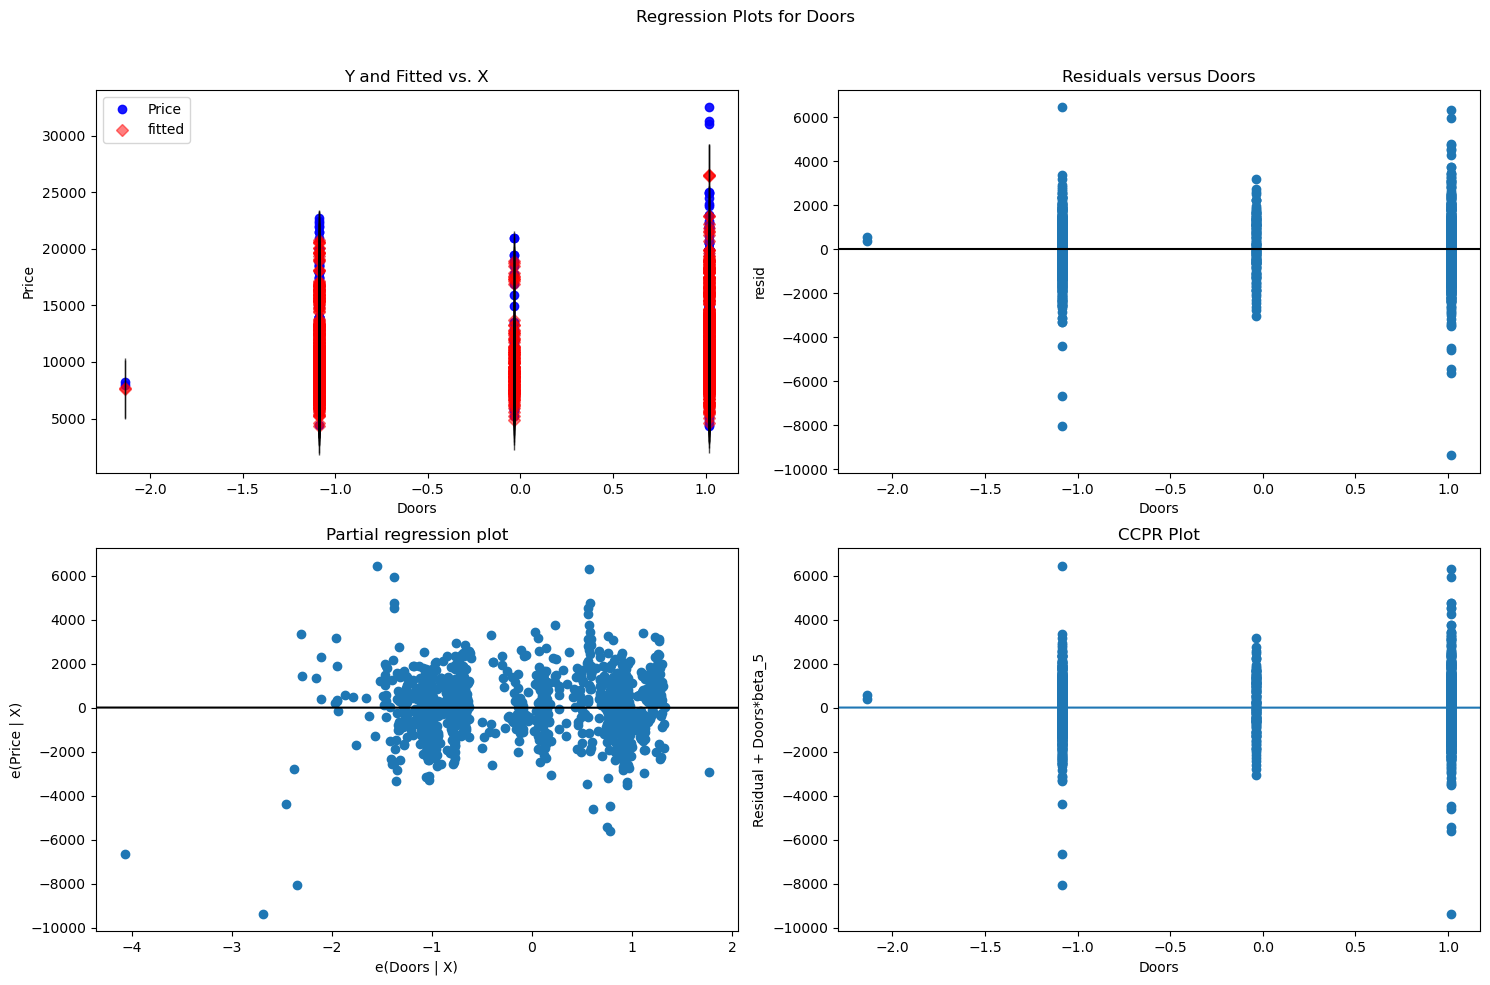

In [56]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


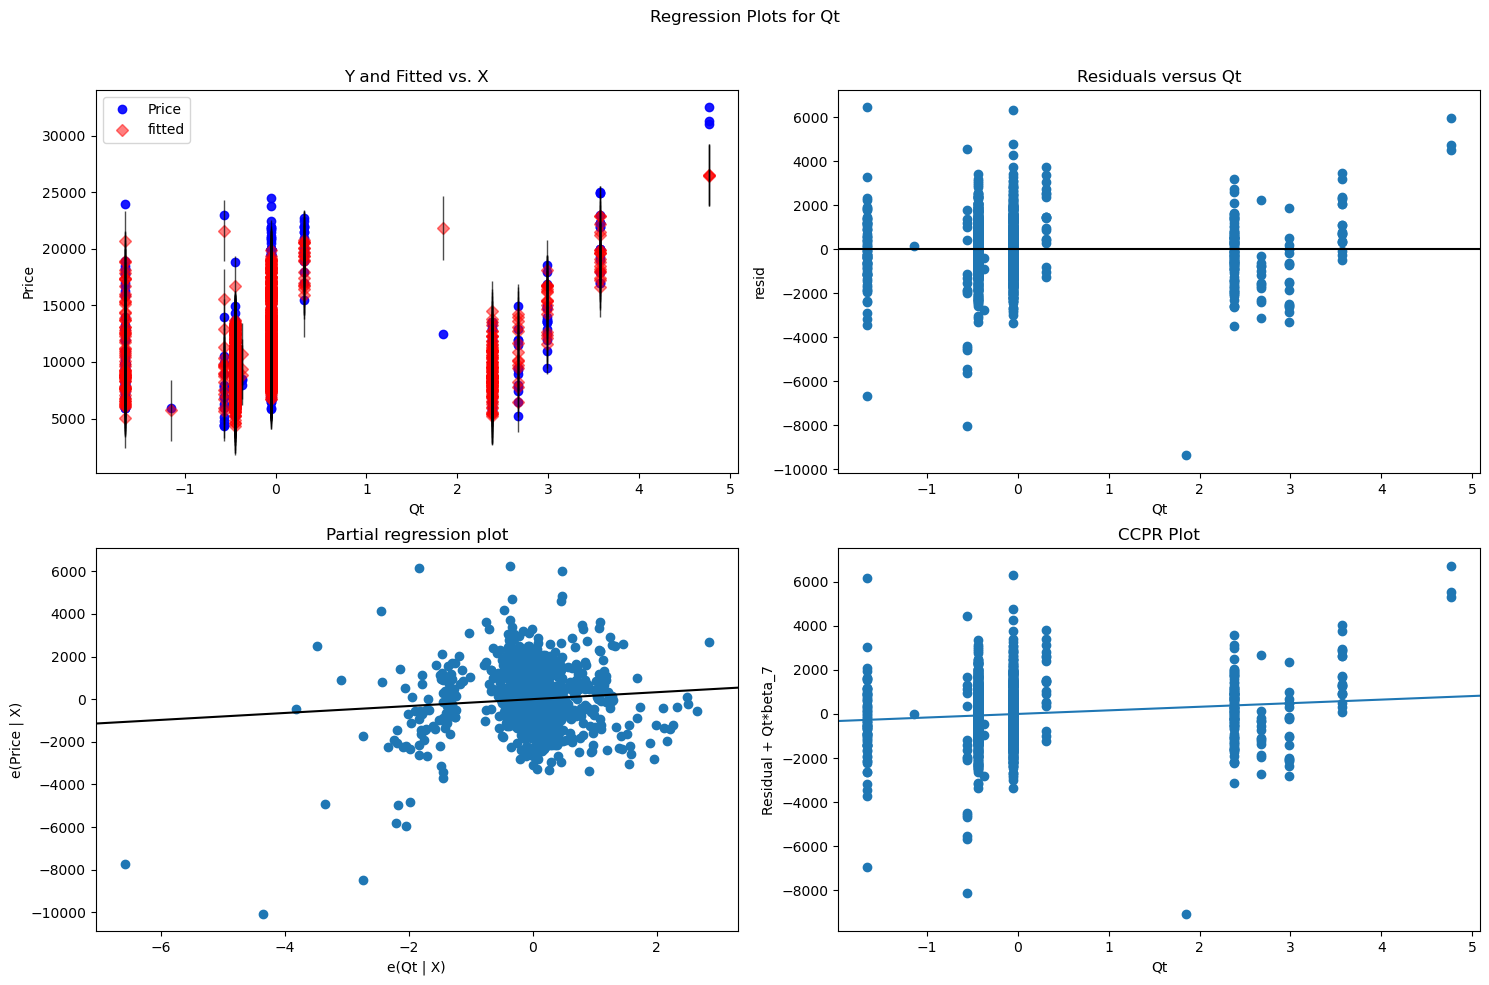

In [57]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Qt", fig=fig)
plt.show()

eval_env: 1


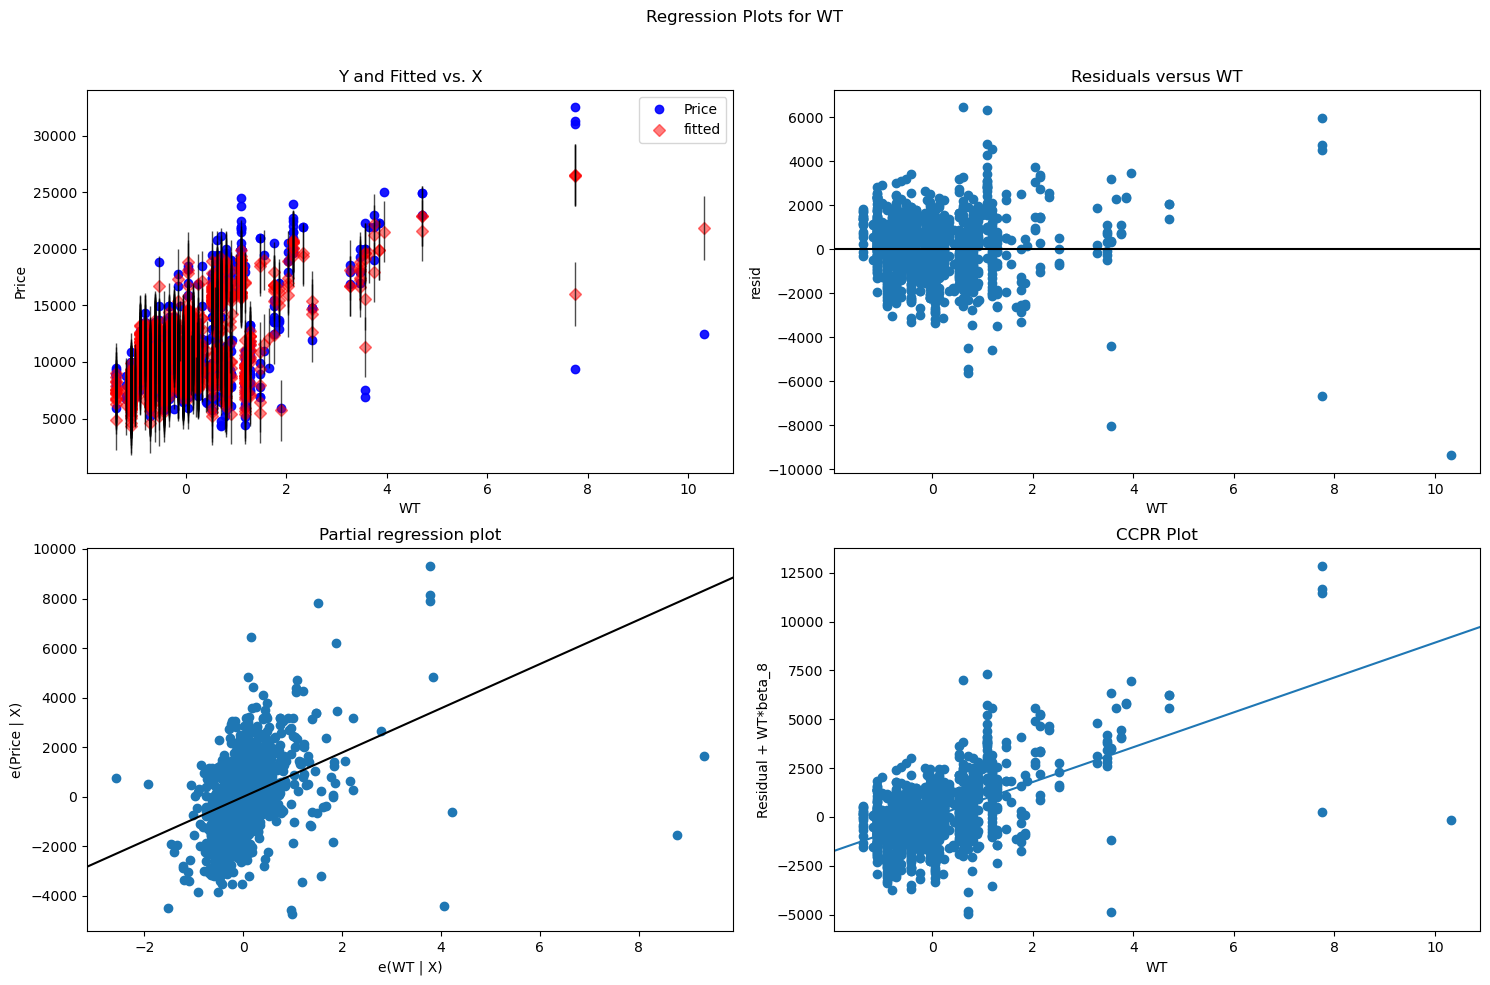

In [58]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# outliers detection and deletion

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence=model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762354e-07, 6.97878368e-04, 1.08627724e-02])

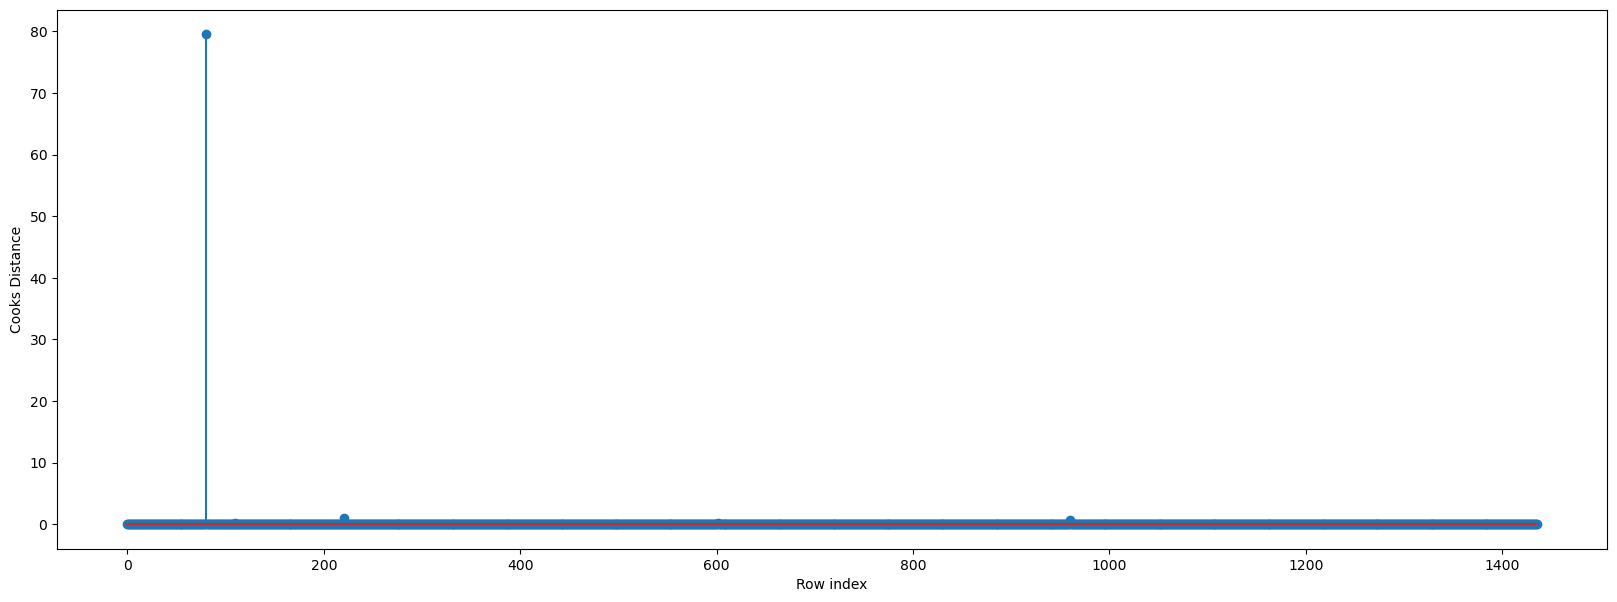

In [60]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_df)), np.round(c, 4))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
(np.argmax(c),np.max(c))

(80, 79.52010624118824)

In [62]:
# leverage point

In [63]:
data_df.shape

(1436, 9)

In [64]:
k = data_df.shape[1]
n = data_df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

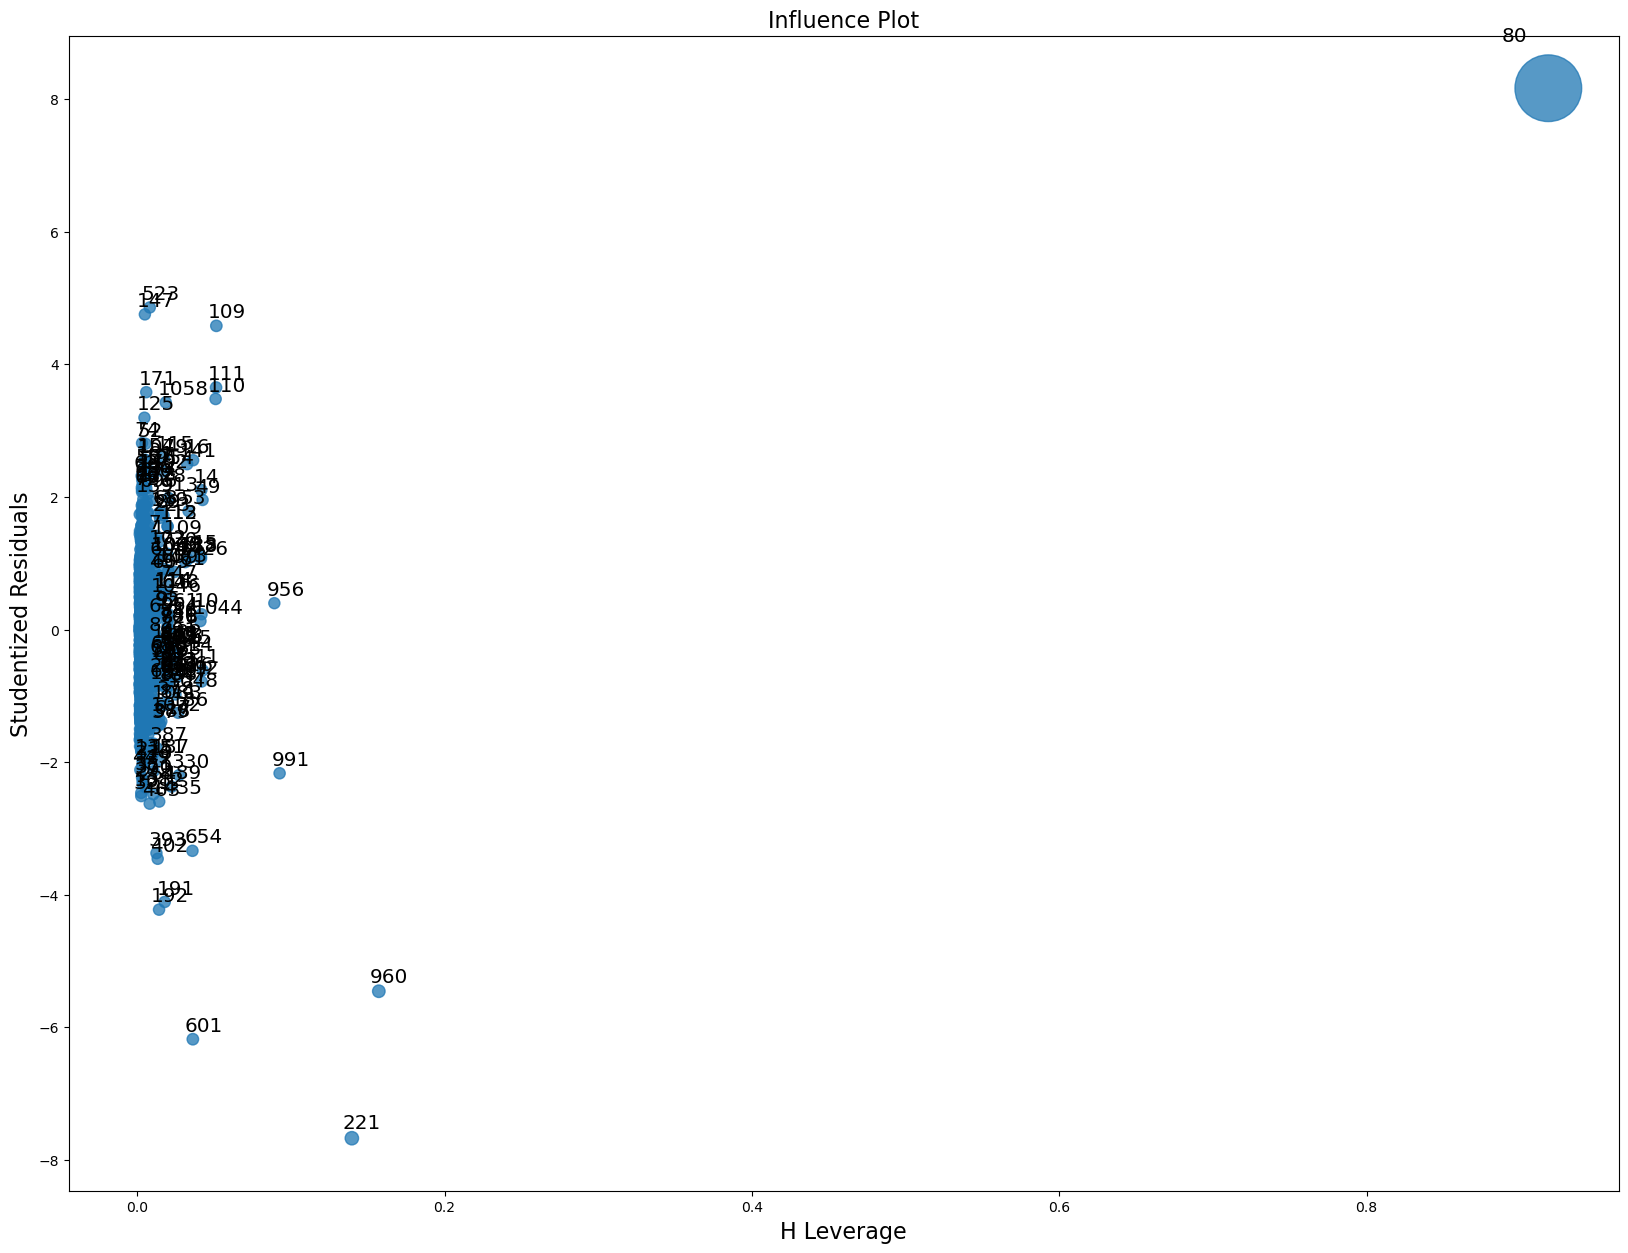

In [65]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(20,15))
fig = sm.graphics.influence_plot(model, ax= ax)

In [ ]:
#From the above plot, it is evident that the influencer data points are 80,109,110,221,601,960,991,956

In [66]:
data_df[data_df.index.isin([80,109,110,221,601,960,991,956])]

,Age,KM,HP,CC,Doors,Gears,Qt,WT,Price
80,-1.664402,-1.293942,0.567440,33.997687,1.014941,-0.140425,0.313211,2.043609,18950
109,-2.793828,-1.827849,0.968085,0.997419,1.014941,-0.140425,4.764218,7.744561,32500
110,-2.793828,-1.721190,0.968085,0.997419,1.014941,-0.140425,4.764218,7.744561,31000
221,-0.642540,0.150393,0.567440,0.054555,1.014941,-0.140425,1.845525,10.309989,12450
601,-0.319847,-1.827849,-0.768042,0.997419,-1.085139,-0.140425,-0.562397,3.563863,7500
956,0.110411,-0.456407,0.567440,0.054555,1.014941,-10.753613,-0.051626,0.618371,10950
960,0.540668,-0.472810,-1.035138,-0.652594,-1.085139,-0.140425,-1.656907,7.744561,9390
991,0.110411,-0.681007,0.567440,0.054555,-0.035099,-10.753613,-0.367818,0.789399,7950


In [67]:
# improving the model by removing the rows
data_f=data_df.drop(data_df.index[[80,109,110,221,601,960,991,956]],axis=0).reset_index()
data_f.head()

,index,Age,KM,HP,CC,Doors,Gears,Qt,WT,Price
0,0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,13500
1,1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,13750
2,2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,13950
3,3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,14950
4,4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.853577,13750


In [68]:
model_f=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qt+WT',data=data_f).fit()

In [69]:
model_f.pvalues

Intercept     0.000000e+00
Age          1.082313e-274
KM            8.121145e-47
HP            1.904019e-35
CC            7.356246e-31
Doors         9.513615e-05
Gears         1.350935e-01
Qt            9.465298e-03
WT           3.630051e-101
dtype: float64

In [70]:
model_f.rsquared

0.8850046057254817

In [71]:
model_f.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.884     
Dependent Variable: Price            AIC:                24321.2492
Date:               2022-11-15 01:31 BIC:                24368.6255
No. Observations:   1428             Log-Likelihood:     -12152.   
Df Model:           8                F-statistic:        1365.     
Df Residuals:       1419             Prob (F-statistic): 0.00      
R-squared:          0.885            Scale:              1.4507e+06
-------------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept 10722.8898  31.9899 335.1964 0.0000 10660.1372 10785.6423
Age       -2059.4796  45.8684 -44.8997 0.0000 -2149.4569 -1969.5024
KM         -658.9311  44.1925 -14.9105 0.0000  -745.6208  -572.2413
HP          520.5432  40.7519  12.7735 0.0000   440.6027   600.4837
CC        -1522.4838 128.7040 -11.8293 0.0000 -1774.9544 -1270.0132
Doors      -138.5815  35.4079  -3.9139 0.0001  -208.0389   -69.1241
Gears        55.0930  36.8474   1.4952 0.1351   -17.1883   127.3743
Qt          145.1116  55.8484   2.5983 0.0095    35.5574   254.6659
WT         1662.8457  71.6932  23.1939 0.0000  1522.2097  1803.4817
-------------------------------------------------------------------
Omnibus:               76.547       Durbin-Watson:          1.727  
Prob(Omnibus):         0.000        Jarque-Bera (JB):       257.286
Skew:                  0.141        Prob(JB):               0.000  
Kurtosis:              5.060        Condition No.:          6      
===================================================================

"""

In [72]:
# accuracy has been improved 88.4

In [73]:
#outliers detection

In [74]:
final_model_influence=model_f.get_influence()
(c1,_)=final_model_influence.cooks_distance
c1

array([7.22469844e-03, 3.73270243e-03, 5.16222237e-03, ...,
       1.65698058e-05, 1.20484538e-03, 2.24504167e-02])

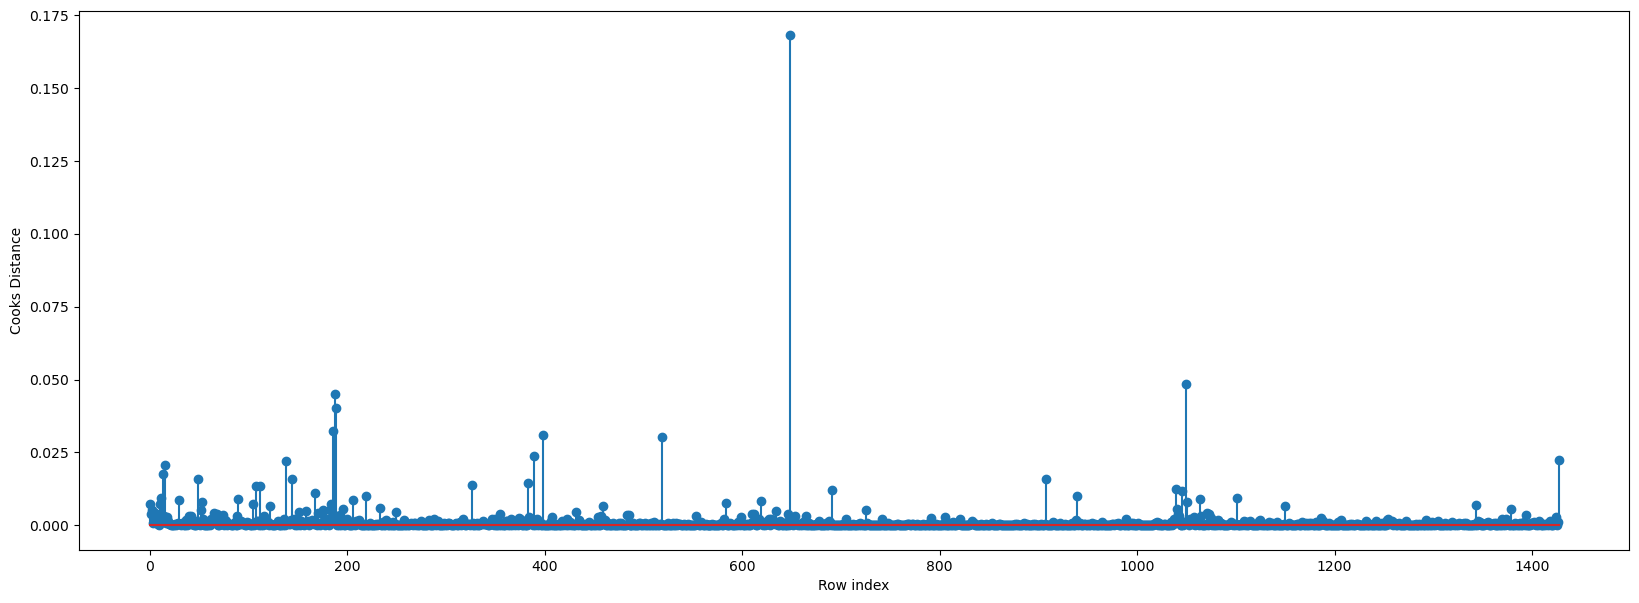

In [75]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_f)), np.round(c1, 4))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [76]:
(np.argmax(c1),np.max(c1))

(649, 0.16822686820360572)

In [77]:
k=data_f.shape[1]
n=data_f.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.023109243697478993

#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [78]:
# buliding the final model

In [79]:
model_final=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qt+WT',data=data_f).fit()

In [80]:
model_final.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.884     
Dependent Variable: Price            AIC:                24321.2492
Date:               2022-11-15 01:31 BIC:                24368.6255
No. Observations:   1428             Log-Likelihood:     -12152.   
Df Model:           8                F-statistic:        1365.     
Df Residuals:       1419             Prob (F-statistic): 0.00      
R-squared:          0.885            Scale:              1.4507e+06
-------------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept 10722.8898  31.9899 335.1964 0.0000 10660.1372 10785.6423
Age       -2059.4796  45.8684 -44.8997 0.0000 -2149.4569 -1969.5024
KM         -658.9311  44.1925 -14.9105 0.0000  -745.6208  -572.2413
HP          520.5432  40.7519  12.7735 0.0000   440.6027   600.4837
CC        -1522.4838 128.7040 -11.8293 0.0000 -1774.9544 -1270.0132
Doors      -138.5815  35.4079  -3.9139 0.0001  -208.0389   -69.1241
Gears        55.0930  36.8474   1.4952 0.1351   -17.1883   127.3743
Qt          145.1116  55.8484   2.5983 0.0095    35.5574   254.6659
WT         1662.8457  71.6932  23.1939 0.0000  1522.2097  1803.4817
-------------------------------------------------------------------
Omnibus:               76.547       Durbin-Watson:          1.727  
Prob(Omnibus):         0.000        Jarque-Bera (JB):       257.286
Skew:                  0.141        Prob(JB):               0.000  
Kurtosis:              5.060        Condition No.:          6      
===================================================================

"""

In [ ]:
#CC & Doors are two feature having P-value more than the 0.05 so we can consider 
#that they don't have significant impact on the Prediction.

In [ ]:
# simple linear regression

In [81]:
model_cc=smf.ols('Price~Gears',data=data_f).fit()

In [82]:
model_cc.pvalues

Intercept    0.000000
Gears        0.012061
dtype: float64

In [ ]:
#removing Gears features,which is not significant to price 

In [ ]:
#P value is lesser than alpha we can not ignore the CC Feature

In [85]:
model_D=smf.ols('Price~Doors',data=data_f).fit()

In [86]:
model_D.pvalues

Intercept    0.000000e+00
Doors        8.746648e-12
dtype: float64

In [ ]:
# P value is lesser than alpha we can not ignore the door Feature

In [ ]:
m_cc_Doors = smf.ols('Price~Doors+CC',data=data_f).fit()

In [ ]:
m_cc_Doors.pvalues

In [87]:
data_df=data_df.drop(columns=['Gears'],axis=0)

In [89]:
model_final1=smf.ols('Price~Age+KM+HP+CC+Doors+Qt+WT',data=data_f).fit()

In [90]:
model_final1.rsquared

0.8848234396842585

In [91]:
model_final1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.884     
Dependent Variable: Price            AIC:                24321.4971
Date:               2022-11-15 01:34 BIC:                24363.6094
No. Observations:   1428             Log-Likelihood:     -12153.   
Df Model:           7                F-statistic:        1558.     
Df Residuals:       1420             Prob (F-statistic): 0.00      
R-squared:          0.885            Scale:              1.4519e+06
-------------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept 10723.6153  32.0001 335.1119 0.0000 10660.8428 10786.3879
Age       -2058.3768  45.8825 -44.8620 0.0000 -2148.3815 -1968.3721
KM         -653.5817  44.0666 -14.8317 0.0000  -740.0244  -567.1390
HP          536.5062  39.3456  13.6357 0.0000   459.3243   613.6880
CC        -1535.7079 128.4556 -11.9552 0.0000 -1787.6911 -1283.7247
Doors      -149.9311  34.5997  -4.3333 0.0000  -217.8031   -82.0592
Qt          149.2197  55.8050   2.6739 0.0076    39.7505   258.6888
WT         1670.1491  71.5577  23.3399 0.0000  1529.7789  1810.5192
-------------------------------------------------------------------
Omnibus:               76.013       Durbin-Watson:          1.730  
Prob(Omnibus):         0.000        Jarque-Bera (JB):       254.576
Skew:                  0.139        Prob(JB):               0.000  
Kurtosis:              5.050        Condition No.:          6      
===================================================================

"""

In [ ]:
# accuracy is improved from 88.4 to 88.5%

In [ ]:
# all the independent feature are less than <0.05,which are significant to price dependent variable

# predict new data

In [92]:
model_final1.predict(data_df)


0       16348.520969
1       15896.145220
2       16329.770305
3       15998.732880
4       15880.210619
            ...     
1431     9152.627396
1432     8530.048824
1433     8675.337794
1434     8787.785027
1435    10837.979907
Length: 1436, dtype: float64

In [ ]:
#creating the dataframe for predicted values

In [93]:
final_pred=pd.DataFrame(data_df['Price'],columns=['Price'])

In [94]:
final_pred['Predicted Price']=model_final1.predict(data_df)

In [95]:
final_pred.head(10)

,Price,Predicted Price
0,13500,16348.520969
1,13750,15896.145220
2,13950,16329.770305
3,14950,15998.732880
4,13750,15880.210619
5,12950,15266.584343
6,16900,17614.542855
7,18600,17608.808565
8,21500,20994.986651
9,12950,13542.154584


In [97]:
df={'Prep_Models':['final Model','Model'],'Rsquared':[model_final1.rsquared,model.rsquared]}
table=pd.DataFrame(df)
print('FINAL MODEL :-')
table

FINAL MODEL :-


,Prep_Models,Rsquared
0,final Model,0.884823
1,Model,0.863763
